In [1]:
import numpy as np
from scipy import signal
from scipy.interpolate import interp1d
from scipy.signal import butter, filtfilt, iirdesign, zpk2tf, freqz
from scipy.interpolate import spline

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

import math
import wave
import sys

In [2]:
###### Plotly ######
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

In [3]:
cor_layout = go.Layout(
    title='Autocorrelation',
    xaxis=dict(
        title='Time',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Correlation',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)

# Uploading data

In [4]:
data = np.genfromtxt("dados/C100_F5k_ON.txt", delimiter=' ', names=['x', 'y'])
# data = np.genfromtxt("dados/C100_F5k_D1_P2_R1.txt", delimiter=' ', names=['x', 'y'])
# data = np.genfromtxt("dados/C100_F5k_D1_P2_R2.txt", delimiter=' ', names=['x', 'y'])
# data = np.genfromtxt("dados/C100_F5k_D1_P1_R1.txt", delimiter=' ', names=['x', 'y'])
# data = np.genfromtxt("dados/C100_F5k_D1_P1_R2.txt", delimiter=' ', names=['x', 'y'])
# data = np.genfromtxt("dados/C100_F5k_D1_P5_R1.txt", delimiter=' ', names=['x', 'y'])
# data = np.genfromtxt("dados/C100_F5k_D1_P5_R2.txt", delimiter=' ', names=['x', 'y'])
# data = np.genfromtxt("dados/C100_F5k_D1_P10_R1.txt", delimiter=' ', names=['x', 'y'])
# data = np.genfromtxt("dados/C100_F5k_D1_P10_R2.txt", delimiter=' ', names=['x', 'y'])

# Organizing data in the matrix

In [12]:
DATASET_SIZE = len(data['y']) # %signal length
GROUP_SIZE = 1000
GROUP_AMOUNT = int(math.floor(DATASET_SIZE/GROUP_SIZE))
flag = 0
matrix = [[0.0 for x in range(GROUP_SIZE)] for y in range(GROUP_AMOUNT)]

for i in range (0,GROUP_AMOUNT):
	for j in range(0,GROUP_SIZE):
		matrix[i][j] =  data['y'][flag]
		flag = flag + 1


1000


# Product by 1st column

In [16]:
c = [[matrix[x][0]*matrix[x][y] for y in range(GROUP_SIZE)] for x in range(GROUP_AMOUNT)]

# Average columns

In [20]:
avg_I = [] 
count = 0.0
for j in range(0,GROUP_SIZE):
	for i in range (0,GROUP_AMOUNT):
		count = count + c[i][j]
	avg_I.append(count/GROUP_AMOUNT)
	count = 0.0

# Autocorrelation

In [23]:
corr = [avg_I[x]/avg_I[0] for x in range(GROUP_SIZE)]
for i in range(len(corr)):
    if corr[i] <= 0.5:
        print('corr:i-1 = ', corr[i-1], ' i-1 = ', i-1)
        print('corr:i = ', corr[i], ' i = ', i)
        break

corr:i-1 =  0.5016748333592359  i-1 =  277
corr:i =  0.49656638429767547  i =  278


In [9]:
corr_pl = go.Scatter(name="correlation", y=corr)
iplot({
    'data': [corr_pl],
    'layout': cor_layout})

/home/maelso/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



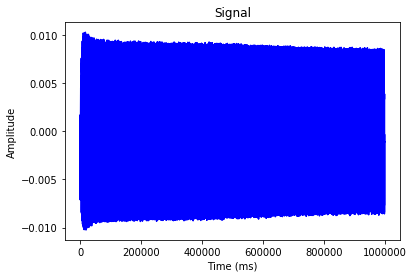

In [11]:
fig2 = plt.figure()
plt.ylabel('Amplitude') 
plt.xlabel('Time (ms)')

ax2 = fig2.add_subplot(111)
ax2.set_title("Signal") 

ax2.plot(data['y'], color='b', label='Signal')